<a href="https://colab.research.google.com/github/NicoFuentese/Ciencia_De_Datos_TD2025/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#**EDA**

In [ ]:
#Cargar dataset
df = pd.read_csv('/content/olimpicos.csv')

In [ ]:
#primeras 5 filas
df.head()

,Atleta,Edad,Altura_cm,Peso_kg,Deporte,Entrenamientos_Semanales,Medallas_Totales,Pais
0,Usain Bolt,34,195,94,Atletismo,6,8,Jamaica
1,Simone Biles,26,142,47,Gimnasia,10,7,EE.UU.
2,Michael Phelps,35,193,88,Natación,9,23,EE.UU.
3,Katie Ledecky,27,183,70,Natación,8,10,EE.UU.
4,Nadia Comaneci,45,160,50,Gimnasia,7,5,Rumania


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes


In [ ]:
df.describe()

,Edad,Altura_cm,Peso_kg,Entrenamientos_Semanales,Medallas_Totales
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,35.000000,174.571429,68.428571,7.285714,8.571429
std,6.831301,18.715921,17.614929,1.799471,6.803361
min,26.000000,142.000000,47.000000,5.000000,3.000000
25%,30.500000,167.000000,57.500000,6.000000,4.500000
50%,35.000000,175.000000,65.000000,7.000000,7.000000
75%,39.000000,188.000000,79.000000,8.500000,9.000000
max,45.000000,195.000000,94.000000,10.000000,23.000000


<Axes: xlabel='Entrenamientos_Semanales', ylabel='Count'>

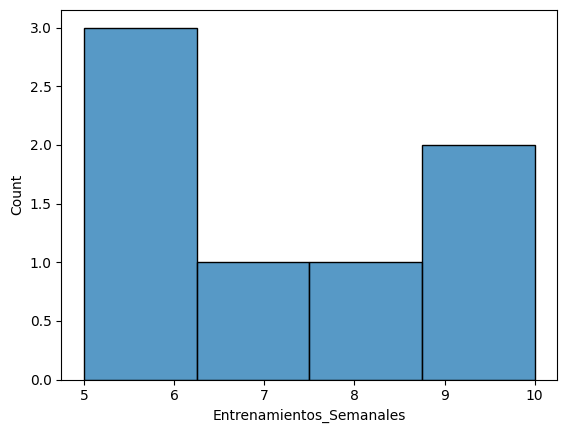

In [ ]:
sns.histplot(df['Entrenamientos_Semanales'])

#**Seccion 2: Estadistica descriptiva**

In [ ]:
#tipo de dato de cada columna
df.info()
#datas tipo int y str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes


In [ ]:
df.head(10)

,Atleta,Edad,Altura_cm,Peso_kg,Deporte,Entrenamientos_Semanales,Medallas_Totales,Pais
0,Usain Bolt,34,195,94,Atletismo,6,8,Jamaica
1,Simone Biles,26,142,47,Gimnasia,10,7,EE.UU.
2,Michael Phelps,35,193,88,Natación,9,23,EE.UU.
3,Katie Ledecky,27,183,70,Natación,8,10,EE.UU.
4,Nadia Comaneci,45,160,50,Gimnasia,7,5,Rumania
5,Mo Farah,38,175,65,Atletismo,6,4,Reino Unido
6,Yelena Isinbayeva,40,174,65,Salto con pértiga,5,3,Rusia


In [ ]:
mean = df["Medallas_Totales"].mean()
median = df["Medallas_Totales"].median()
mode = df["Medallas_Totales"].mode().iloc[0] #todos son 1, entonces es por defecto el 3
std = df["Altura_cm"].std()
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)
print("Desviación estándar:", std)

Media: 8.571428571428571
Mediana: 7.0
Moda: 3
Desviación estándar: 18.715921411614076


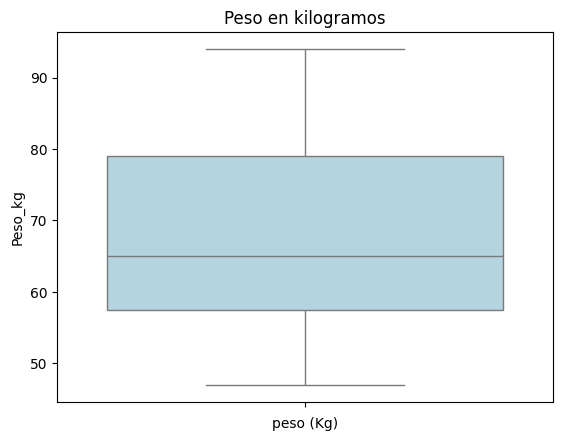

In [ ]:
plt.figure()
sns.boxplot(df["Peso_kg"], color = "lightblue")
plt.title("Peso en kilogramos")
plt.xlabel("peso (Kg)")
plt.show()

#**Seccion 3: Analisis de correlacion**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes


In [ ]:
#correlacion entre entrenamientos semanales y medallas totales

corr = df["Entrenamientos_Semanales"].corr(df["Medallas_Totales"])
print("Correlacion:", corr)

Correlacion: 0.5698362008613984


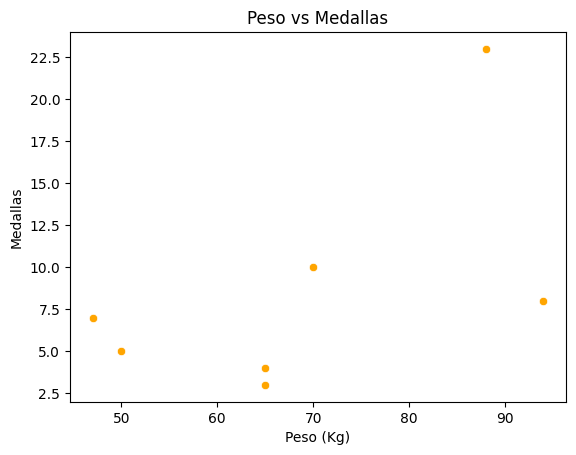

In [ ]:
#scatter entre peso y medallas totales
plt.figure()
sns.scatterplot(x = "Peso_kg", y = "Medallas_Totales", data = df, color = "orange")
plt.title("Peso vs Medallas")
plt.xlabel("Peso (Kg)")
plt.ylabel("Medallas")
plt.show()

In [ ]:
#relacion de corr
correlacion_explicacion = (
    "Existe una correlación de {:.2f} entre los entrenamientos semanales y las medallas totales. ".format(corr) +
    ("Esto sugiere una relación positiva débil." if 0.1 < corr < 0.5 else
     "Esto sugiere una relación fuerte." if corr >= 0.5 else
     "Esto sugiere una relación muy débil o inexistente.")
)

corr, correlacion_explicacion

(np.float64(0.5698362008613984),
 'Existe una correlación de 0.57 entre los entrenamientos semanales y las medallas totales. Esto sugiere una relación fuerte.')

#**Seccion 4: Regresion lineal**

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:       Medallas_Totales   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2.404
Date:                Wed, 09 Jul 2025   Prob (F-statistic):              0.182
Time:                        23:46:26   Log-Likelihood:                -21.441
No. Observations:                   7   AIC:                             46.88
Df Residuals:                       5   BIC:                             46.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

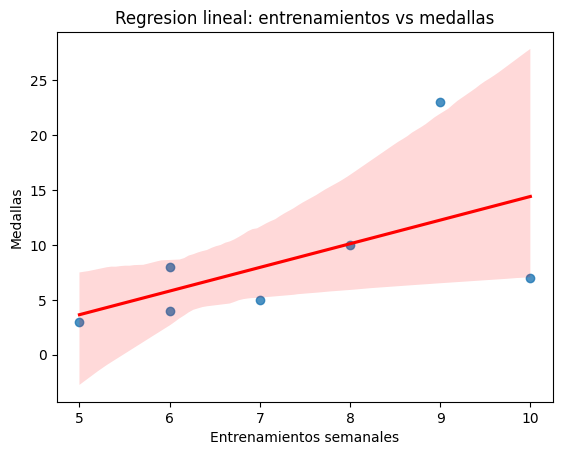

Intercepto: -7.124999999999999
Pendiente: 2.1544117647058827
Coeficiente de determinación (R^2): 0.32471329581215214


In [ ]:
X = df["Entrenamientos_Semanales"]
y = df["Medallas_Totales"]

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()

intercepto = model.params["const"]
pendiente = model.params["Entrenamientos_Semanales"]
r_cuadrado = model.rsquared

print(model.summary())

plt.figure()
sns.regplot(x = "Entrenamientos_Semanales", y = "Medallas_Totales", data = df, line_kws = {"color" : "red"})
plt.title("Regresion lineal: entrenamientos vs medallas")
plt.xlabel("Entrenamientos semanales")
plt.ylabel("Medallas")
plt.show()

print("Intercepto:", intercepto)
print("Pendiente:", pendiente)
print("Coeficiente de determinación (R^2):", r_cuadrado)

#**Visualizacion de datos con Seaborn y Matplotlib**

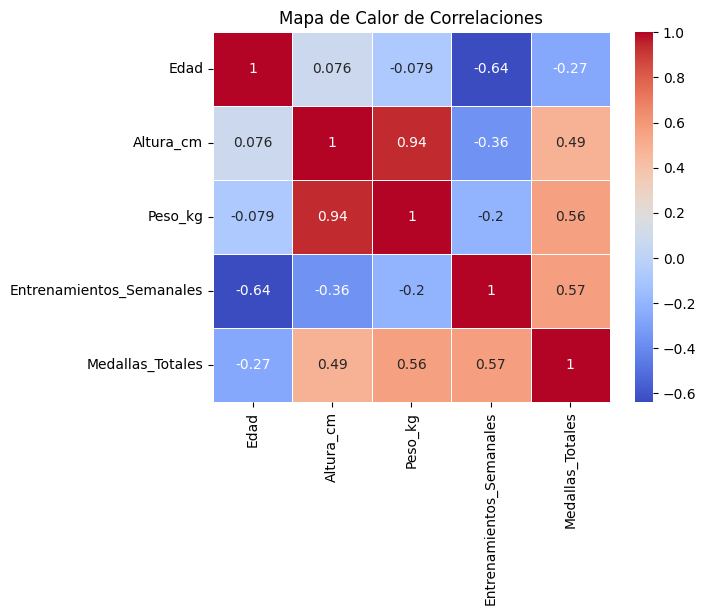

In [ ]:
plt.figure()
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

/tmp/ipython-input-35-279392301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Deporte', y='Medallas_Totales', data=df, palette="pastel")


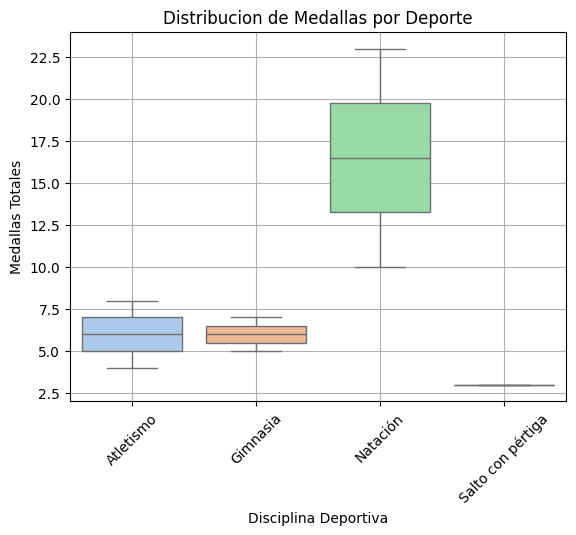

In [ ]:
plt.figure()
sns.boxplot(x='Deporte', y='Medallas_Totales', data=df, palette="pastel")
plt.title('Distribucion de Medallas por Deporte')
plt.xlabel('Disciplina Deportiva')
plt.ylabel('Medallas Totales')
plt.xticks(rotation=45)
plt.grid()
plt.show()